<a href="https://colab.research.google.com/github/sandeepraji/raji/blob/main/healthcareproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from google.colab import files
uploaded = files.upload()


Saving health care diabetes.csv to health care diabetes (1).csv


**Context:**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Problem Statement:

Build a model to accurately predict whether the patients in the dataset have diabetes or not?

**Dataset Description:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

Approach:

Following pointers will be helpful to structure your findings.   

1.	Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
•	Glucose
•	BloodPressure
•	SkinThickness
•	Insulin
•	BMI

      How will you treat these values?

2.	Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

3.	 We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 


4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

6.	Perform correlation analysis. Visually explore it using a heat map.

(Note: Do not focus on visualization aspects when working with SAS)

7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

(Note: if you are working with SAS, ignore this question and perform stratified sampling to partition the data. Create strata of age for this.)

8.	Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.

(Note: if you are working with SAS, ignore this question. Apply logistic regression technique to build the model.)

9.	Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

10.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 

a)	Pie chart to describe the diabetic/non-diabetic population
b)	Scatter charts between relevant variables to analyse the relationships
c)	Histogram/frequency charts to analyse the distribution of the data
d)	Heatmap of correlation analysis among the relevant variables
e)	Create bins of Age values – 20-25, 25-30, 30-35 etc. and analyse different variables for these age brackets using a bubble chart. 












In [65]:
#importing the dataset
import io
data = pd.read_csv(io.BytesIO(uploaded['health care diabetes.csv']))


In [66]:
#Viewing first 5 rows of the dataset to have an idea about what exactly the data is about
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
#Checking for the missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [68]:
#Checking to the inforamtion about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [69]:
# From the above dataset we can able  to see that the target Outcome variable as "Outcome" which is "1" or "0" where 1 indicates the patient has diabetis (and we consider this as Positive) and 0 indicates that the patient doesnot have diabetis(and we consider this as Healthy)
Positive = data[data["Outcome"]==1]
Positive.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [70]:
Positive.shape

(268, 9)

In [71]:
Healthy =data[data["Outcome"]!=1]
Healthy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [72]:
Healthy.shape

(500, 9)

In [73]:
data.shape
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [74]:
#From the above we can able to see that the min values as Zero's which means there are missing values as the Glusose,BP,Skinthickness,Insulin,BMI cannnot be Zero,Hence we repalce then with Mean values

In [75]:
data["Glucose"]=data["Glucose"].replace(0,data["Glucose"].mean())

Mean of Glucose level is :- 121.68160502115886
Datatype of Glucose Variable is :- float64


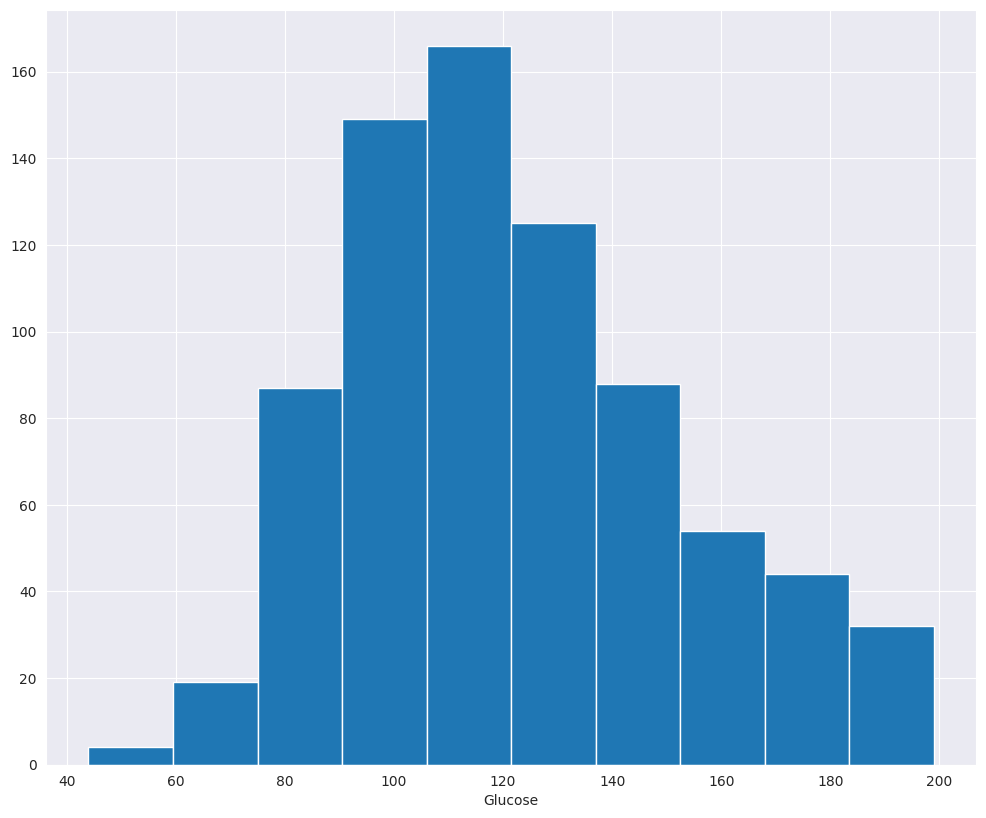

In [76]:
#Lets visualize the same
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,10),dpi=100)
plt.xlabel("Glucose")
plt.hist(data["Glucose"])
sns.set_style(style="darkgrid")
print("Mean of Glucose level is :-",data["Glucose"].mean())
print("Datatype of Glucose Variable is :-", data["Glucose"].dtypes)

In [77]:
data["BloodPressure"]=data["BloodPressure"].replace(0,data["BloodPressure"].mean())

Mean of the BloodPressure is :- 72.25480651855469
Datatype of the BloodPressure variable is :- float64


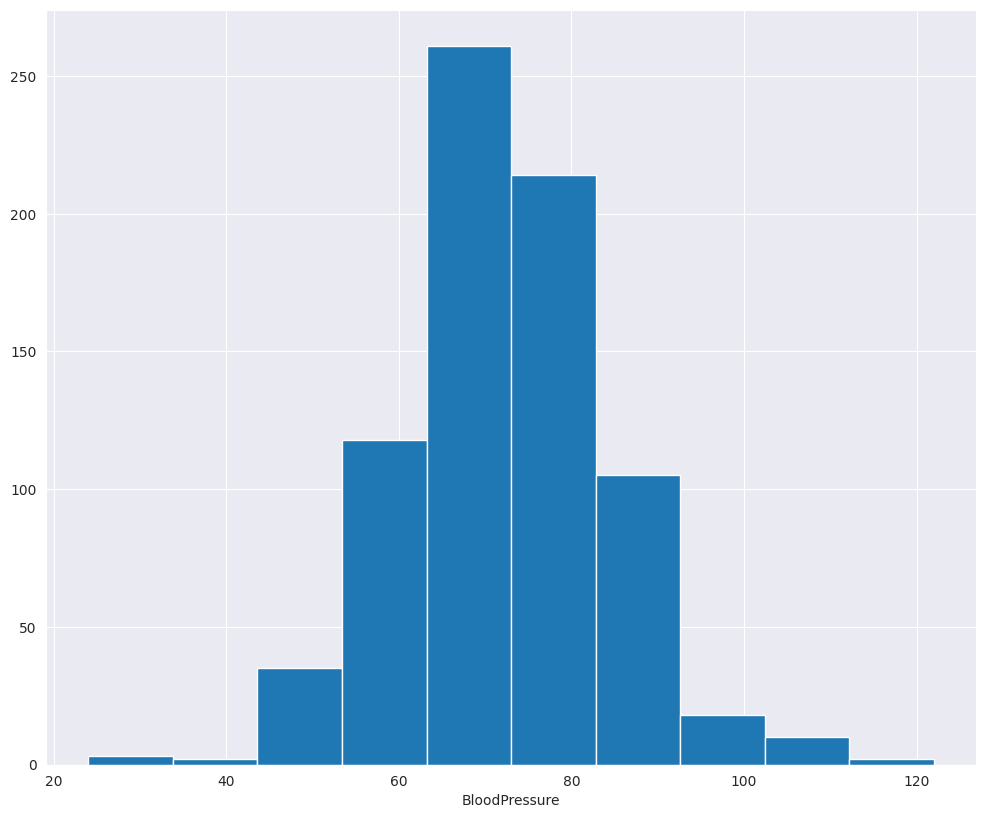

In [78]:
plt.figure(figsize=(12,10),dpi=100)
plt.xlabel("BloodPressure")
plt.hist(data["BloodPressure"])
sns.set_style(style="darkgrid")
print("Mean of the BloodPressure is :-",data["BloodPressure"].mean())
print("Datatype of the BloodPressure variable is :-",data["BloodPressure"].dtypes)

Mean of Skinthickness is:- 26.606479220920118
Datatype of Skinthickness is :- float64


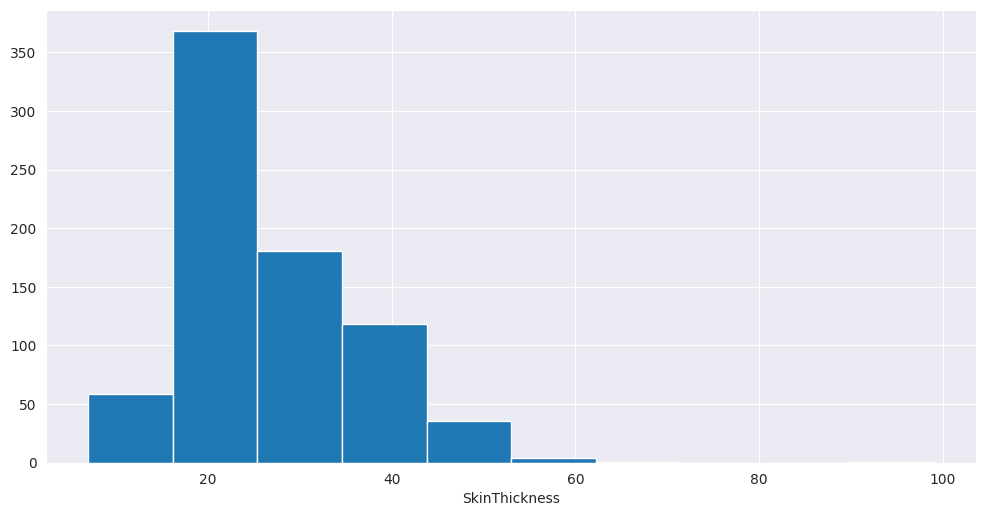

In [79]:
data["SkinThickness"]=data["SkinThickness"].replace(0,data["SkinThickness"].mean())
plt.figure(figsize=(12,6),dpi=100)
plt.xlabel("SkinThickness")
plt.hist(data["SkinThickness"])
sns.set_style(style="darkgrid")
print("Mean of Skinthickness is:-",data["SkinThickness"].mean())
print("Datatype of Skinthickness is :-",data["SkinThickness"].dtypes)

Mean of BMI is :- 32.45080515543617
Datatype of BMI :- float64


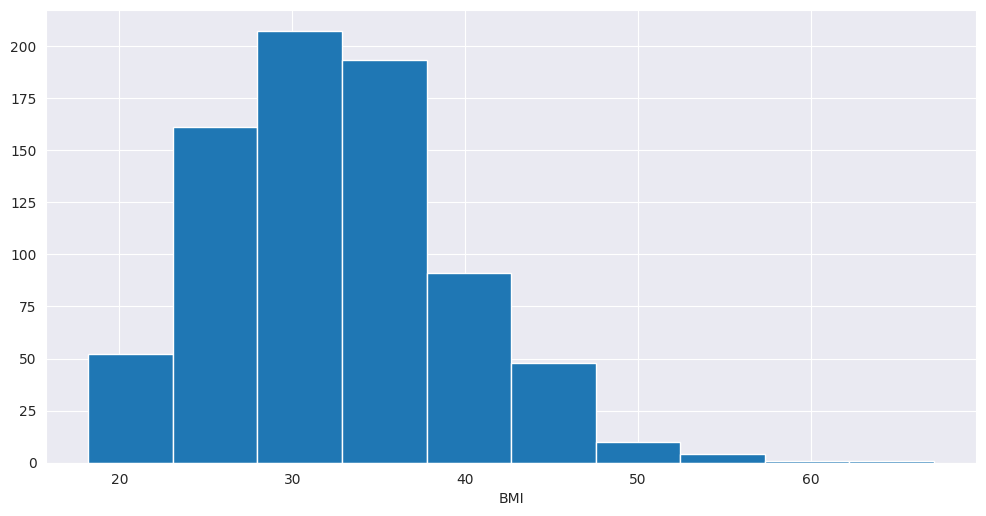

In [80]:
data["BMI"] =data["BMI"].replace(0,data["BMI"].mean())
plt.figure(figsize=(12,6),dpi=100)
plt.xlabel("BMI")
plt.hist(data["BMI"])
sns.set_style(style="darkgrid")
print("Mean of BMI is :-", data["BMI"].mean())
print("Datatype of BMI :-",data["BMI"].dtypes)

Mean of Insulin is :- 118.66016303168442
Dataype off Insulin is :- float64


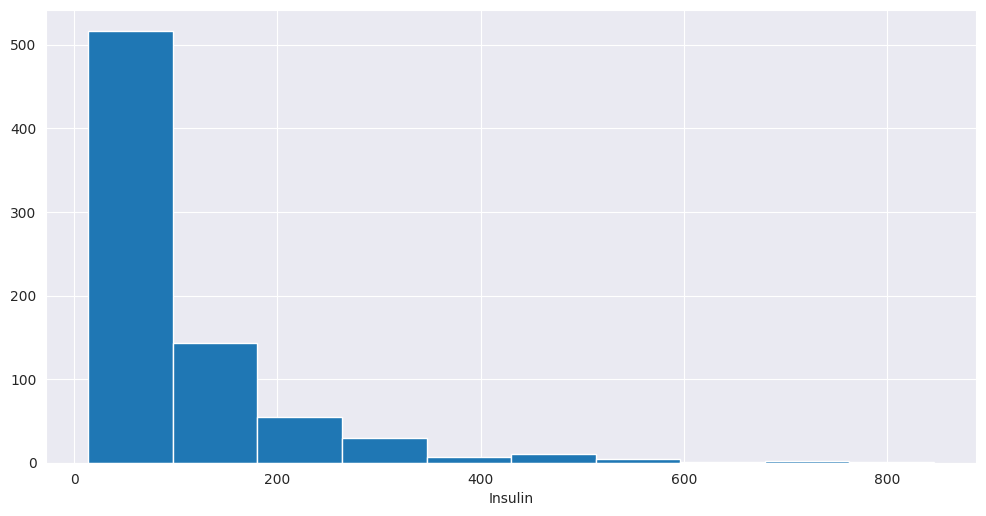

In [81]:
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
plt.figure(figsize=(12,6),dpi=100)
plt.xlabel("Insulin")
plt.hist(data['Insulin'])
sns.set_style(style="darkgrid")
print("Mean of Insulin is :-" , data['Insulin'].mean())
print("Dataype off Insulin is :-",data['Insulin'].dtypes)

In [82]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [83]:
#From the above we can able to see that thereare no Zero values from Col 2 to 6 

In [84]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


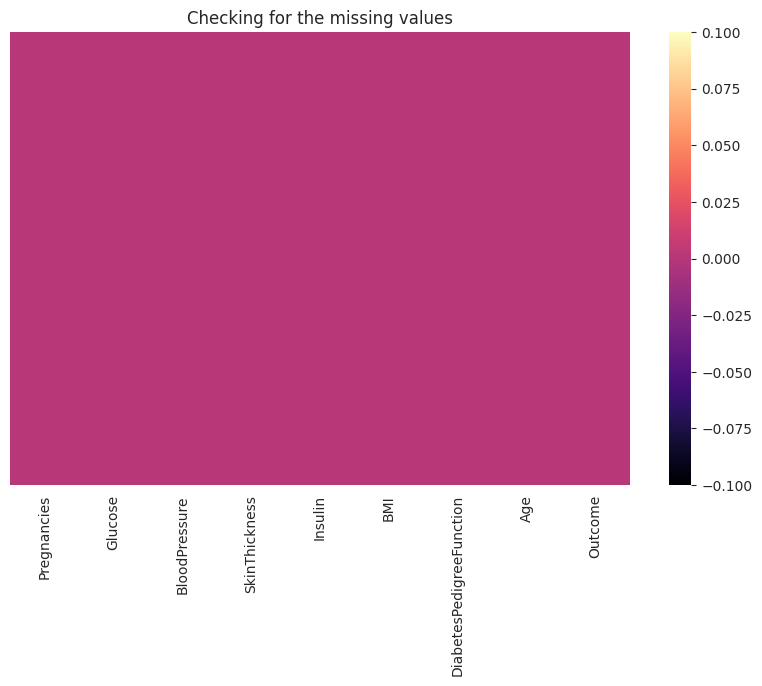

In [85]:
#Checking the missing values with HEatmap
plt.figure(figsize=(10,6),dpi=100)
plt.title("Checking for the missing values")
sns.heatmap(data.isnull(),cmap="magma",yticklabels=False)

Count of Class :
 0    500
1    268
Name: Outcome, dtype: int64


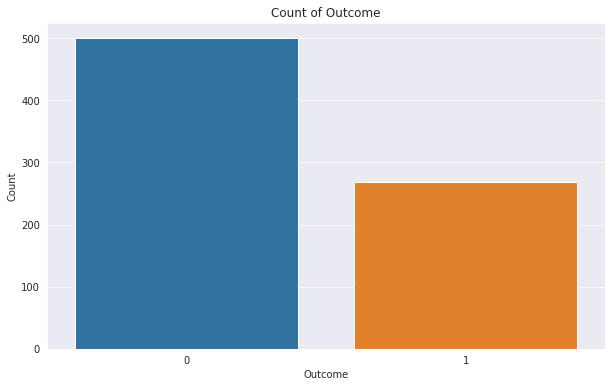

In [86]:
#Now visualizing the Outcome count
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
sns.countplot(data["Outcome"])
plt.title("Count of Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
print("Count of Class :\n",data["Outcome"].value_counts())

Text(0.5, 1.0, 'Scatter plot b/w the variables')

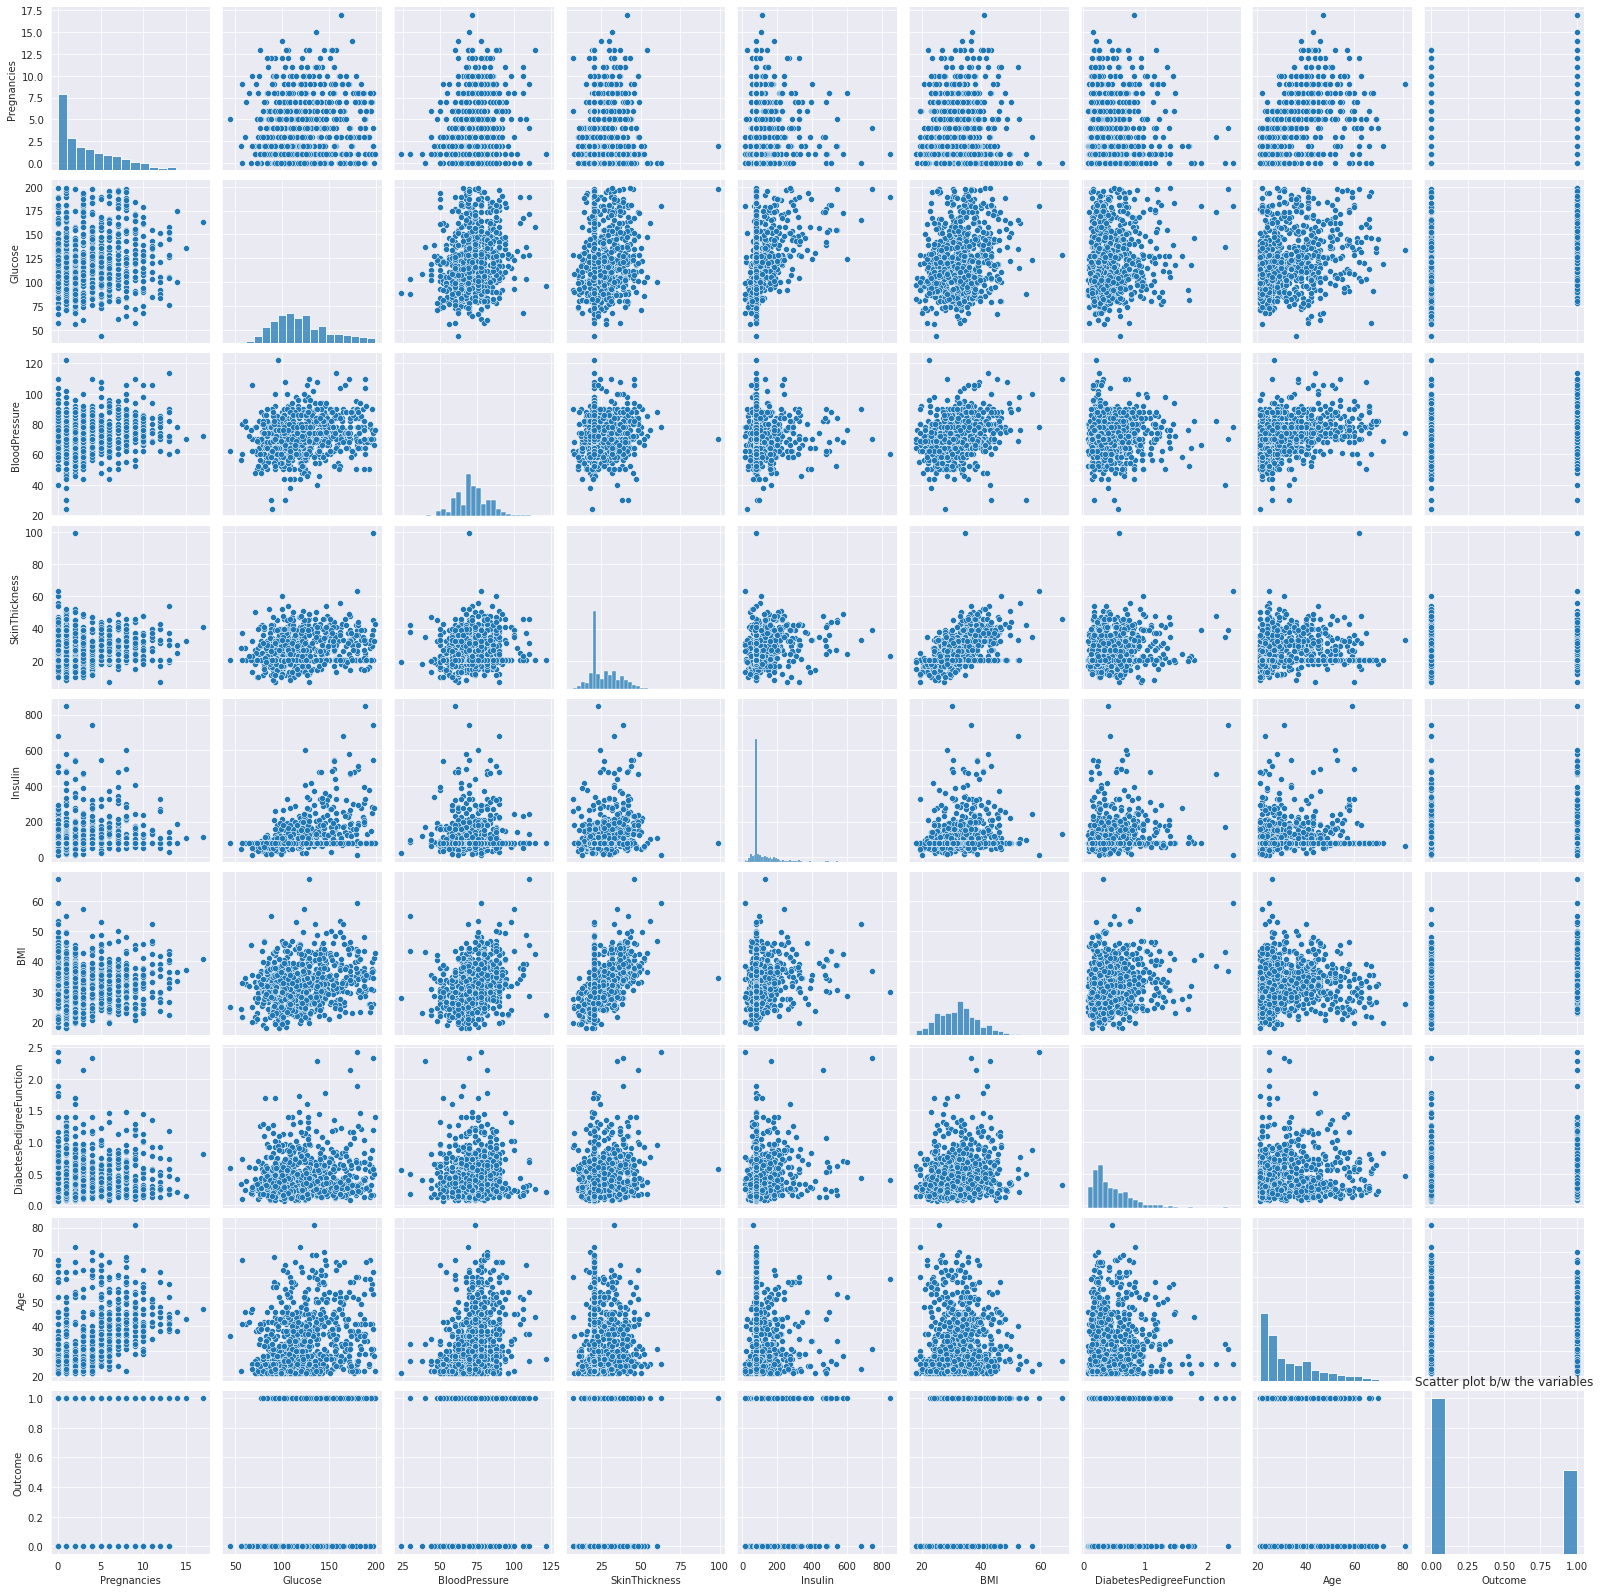

In [29]:
#Now visualize all the variables using a Pairplot Function by this we able able to see any relation exists among the variables
sns.pairplot(data)
plt.title("Scatter plot b/w the variables")

In [30]:
#From the above scatter plots we can clearly see that there is no strong multicollinarity between the variables but there is a small correlation between BMI and Skinthickness ,Pregnancy and age

In [31]:
# We can also find the relation among the variables using below data.corr() method
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


In [32]:
#From the above analysis we can see that there is a correction between BMI and Skinthickness / Age and Pregnencies

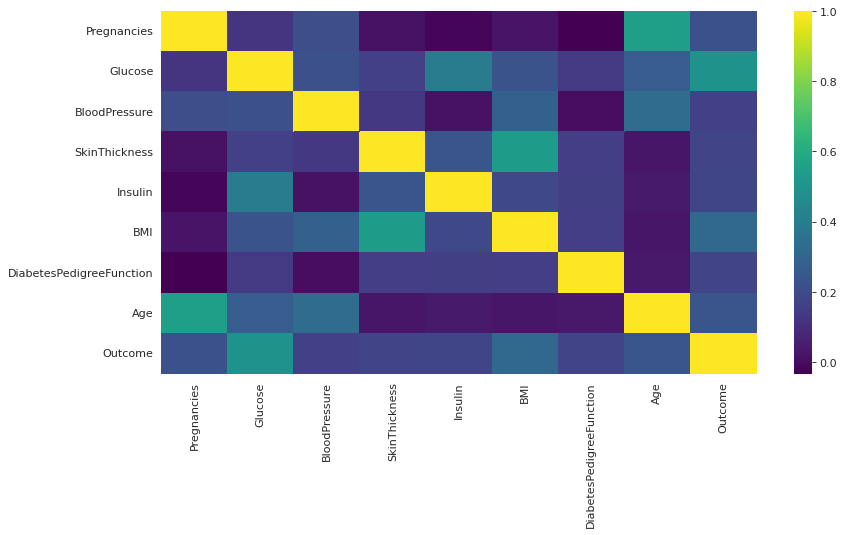

In [33]:
# We can also visualize the corellation among the variables by using Heatmap
plt.figure(figsize=(12,6),dpi=80)
sns.heatmap(data.corr(),cmap='viridis')

In [34]:
#Lets model the above dataset and start importing necessary libraries.
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.model_selection import train_test_split

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [35]:
x =data.drop("Outcome",axis=1).values
y=data["Outcome"].values

In [36]:
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [38]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [39]:
scale=StandardScaler()
stand_x_train =scale.fit_transform(X_train)
stand_x_test=scale.fit_transform(X_test)

In [40]:
#Normalizing the data
data_norm =x
data_normalized=preprocessing.normalize(x)
X_train_norm,X_test_norm,y_train_norm,y_test_norm =train_test_split(data_normalized,y,test_size=0.2,random_state=0)

In [41]:
print(X_train_norm.shape)
print(X_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [42]:
#This is a classification model with data in numerical hence Logistic regression can be used to model this data,
#Along with these we can also use Randon Forest  ,Decision tree ,SVM(Support vector meachine) 
#to calucate the acuracy of the model and 
#we will find out which of these models provide better accuracy score.

In [43]:
# K-Nearest Neibours (KNN) Using Standard Scaling

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn_model =KNeighborsClassifier(n_neighbors=25)

In [46]:
knn_model.fit(stand_x_train,y_train)
knnn_predict =knn_model.predict(stand_x_test)

model validation =======>

Accuracy score of KNN Model : :
0.8116883116883117

 Classification Report : :
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       110
           1       0.66      0.70      0.68        44

    accuracy                           0.81       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.82      0.81      0.81       154


 ROC Curve : :


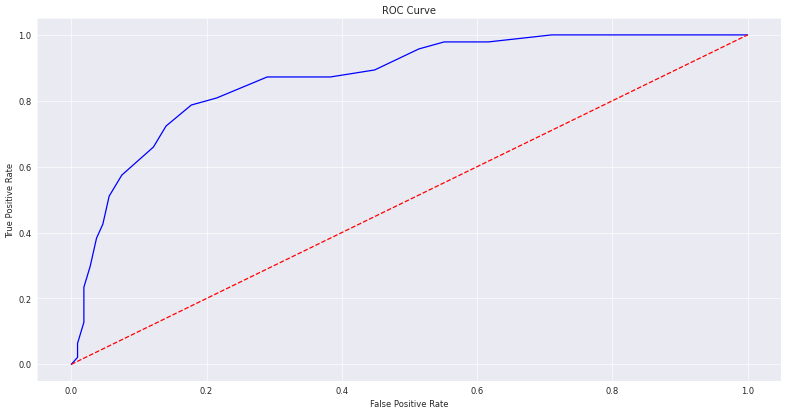

In [47]:
print("model validation =======>\n")
print("Accuracy score of KNN Model : :")
print(metrics.accuracy_score(knnn_predict,y_test))
print("\n","Classification Report : :")
print(metrics.classification_report(knnn_predict,y_test))
print("\n","ROC Curve : :")
knn_prob =knn_model.predict_proba(stand_x_test)
knn_prob1=knn_prob[:,1]
fpr,tpr,thres =metrics.roc_curve(y_test,knn_prob1)
roc_auc_knn =metrics.auc(fpr,tpr)
plt.figure(figsize=(16,8),dpi=60)
sns.set_style(style="darkgrid")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr,'b',label="AUC Score =%0.2f"%roc_auc_knn)
plt.plot(fpr,fpr,"r--",color="red")

In [48]:
# KNN with Normaliastion 

In [49]:
from sklearn.neighbors import KNeighborsClassifier
Knnmodel=KNeighborsClassifier(n_neighbors=25)
knn_model.fit(X_train_norm,y_train)
knnn_predict_norm =knn_model.predict(X_test_norm)

model validation =======>

Accuracy score of KNN Model : :
0.6948051948051948

 Classification Report : :
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       118
           1       0.38      0.50      0.43        36

    accuracy                           0.69       154
   macro avg       0.61      0.63      0.61       154
weighted avg       0.73      0.69      0.71       154


 ROC Curve : :


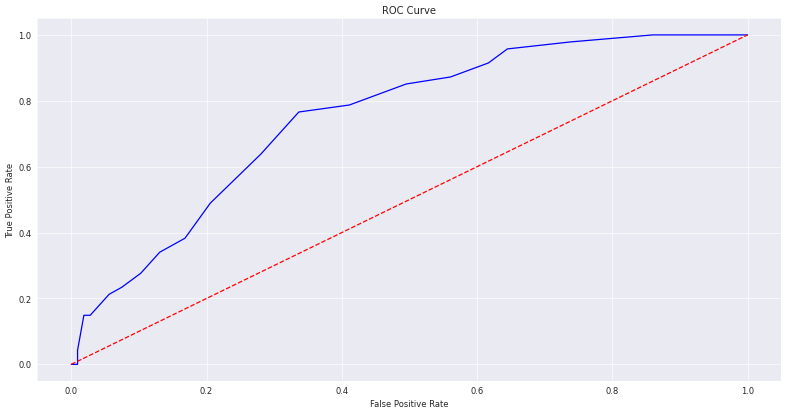

In [50]:
print("model validation =======>\n")
print("Accuracy score of KNN Model : :")
print(metrics.accuracy_score(knnn_predict_norm,y_test))
print("\n","Classification Report : :")
print(metrics.classification_report(knnn_predict_norm,y_test))
print("\n","ROC Curve : :")
knn_prob =knn_model.predict_proba(X_test_norm)
knn_prob1=knn_prob[:,1]
fpr,tpr,thres =metrics.roc_curve(y_test,knn_prob1)
roc_auc_knn =metrics.auc(fpr,tpr)
plt.figure(figsize=(16,8),dpi=60)
sns.set_style(style="darkgrid")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr,'b',label="AUC Score =%0.2f"%roc_auc_knn)
plt.plot(fpr,fpr,"r--",color="red")

In [51]:
# From the above models -KNN Model with Standardasation is more accurate than Normalizaton 

In [52]:
# Support Vector Classifier

In [53]:
from sklearn.svm import SVC

In [54]:
SVC_model=SVC(kernel="linear",random_state=0,probability=True,C=0.01)
SVC_model.fit(stand_x_train,y_train)
SVC_predict=SVC_model.predict(stand_x_test)

Model Validation ==>:

Accuracy Score : :
0.8051948051948052

 Classification Report : : 
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       117
           1       0.57      0.73      0.64        37

    accuracy                           0.81       154
   macro avg       0.74      0.78      0.75       154
weighted avg       0.83      0.81      0.81       154


 ROC Curve : :


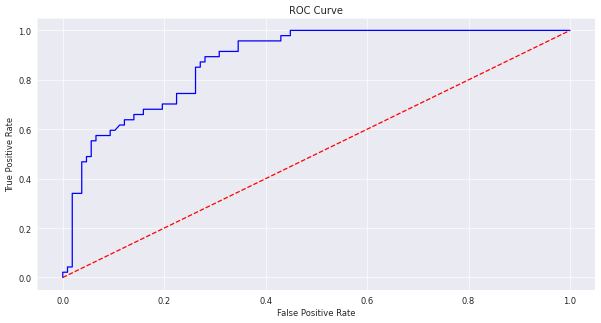

In [55]:
print("Model Validation ==>:\n")
print("Accuracy Score : :")
print(metrics.accuracy_score(SVC_predict,y_test))
print("\n", "Classification Report : : ")
print(metrics.classification_report(SVC_predict,y_test))
print("\n", "ROC Curve : :")
SVC_predict_prob=SVC_model.predict_proba(stand_x_test)
SVC_predict_prob1=SVC_predict_prob[:,1]
fpr,tpr,thres = metrics.roc_curve(y_test,SVC_predict_prob1)
ruc_auc_SVC=metrics.auc(fpr,tpr)
plt.figure(figsize=(12,6),dpi=60)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr,'b',label="AUC Score =%0.2f"%ruc_auc_SVC)
plt.plot(fpr,fpr,'r--',color="red")

In [56]:
SVC_model_rbf=SVC(kernel="rbf",random_state=0,probability=True,C=1)
SVC_model_rbf.fit(stand_x_train,y_train)
SVC_predict=SVC_model_rbf.predict(stand_x_test)

Model Validation ==>:

Accuracy Score : :
0.7987012987012987

 Classification Report : : 
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       112
           1       0.62      0.69      0.65        42

    accuracy                           0.80       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.81      0.80      0.80       154


 ROC Curve : :


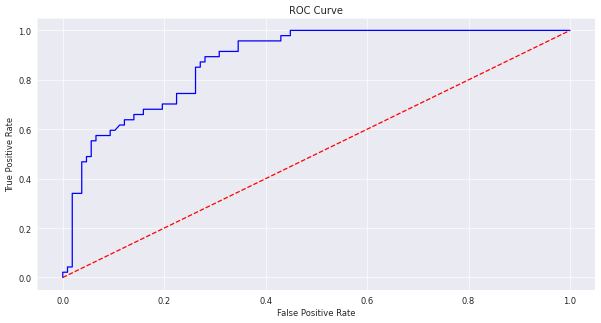

In [57]:
print("Model Validation ==>:\n")
print("Accuracy Score : :")
print(metrics.accuracy_score(SVC_predict,y_test))
print("\n", "Classification Report : : ")
print(metrics.classification_report(SVC_predict,y_test))
print("\n", "ROC Curve : :")
SVC_predict_prob=SVC_model.predict_proba(stand_x_test)
SVC_predict_prob1=SVC_predict_prob[:,1]
fpr,tpr,thres = metrics.roc_curve(y_test,SVC_predict_prob1)
ruc_auc_SVC=metrics.auc(fpr,tpr)
plt.figure(figsize=(12,6),dpi=60)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr,'b',label="AUC Score =%0.2f"%ruc_auc_SVC)
plt.plot(fpr,fpr,'r--',color="red")

In [58]:
#SVC Linear kernal is more accurate than RBF(Radial Basis Function) as the varibles are more linear with Outcome

In [59]:
# Logistic Regression 

In [60]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(C=0.01)
lr_model.fit(stand_x_train,y_train)
lr_predict=lr_model.predict(stand_x_test)

Model Validation ==>:

Accuracy Score : :
0.8181818181818182

 Classification Report : : 
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       119
           1       0.57      0.77      0.66        35

    accuracy                           0.82       154
   macro avg       0.75      0.80      0.77       154
weighted avg       0.85      0.82      0.83       154


 ROC Curve : :


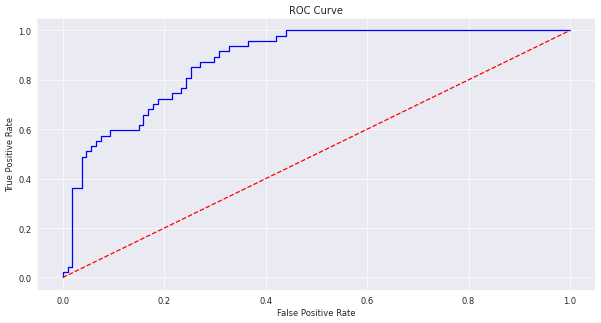

In [61]:
print("Model Validation ==>:\n")
print("Accuracy Score : :")
print(metrics.accuracy_score(lr_predict,y_test))
print("\n", "Classification Report : : ")
print(metrics.classification_report(lr_predict,y_test))
print("\n", "ROC Curve : :")
lr_predict_prob=lr_model.predict_proba(stand_x_test)
lr_predict_prob1=lr_predict_prob[:,1]
fpr,tpr,thres = metrics.roc_curve(y_test,lr_predict_prob1)
ruc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(figsize=(12,6),dpi=60)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr,'b',label="AUC Score =%0.2f"%ruc_auc_lr)
plt.plot(fpr,fpr,'r--',color="red")

In [62]:
# Random Forest 

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf_model =RandomForestClassifier(n_estimators=1000,random_state=0)
rf_model.fit(stand_x_train,y_train)
rf_predict=rf_model.predict(stand_x_test)

model Validation ==>
Accuracy Score of RF : : 

0.8311688311688312

 Classification Report : :
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       109
           1       0.70      0.73      0.72        45

    accuracy                           0.83       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.83      0.83      0.83       154

ROC Curve : :


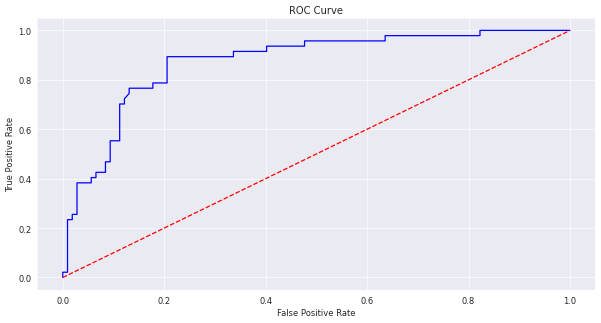

In [64]:
print("model Validation ==>")
print("Accuracy Score of RF : : \n")
print(metrics.accuracy_score(rf_predict,y_test))
print("\n" , "Classification Report : :")
print(metrics.classification_report(rf_predict,y_test))
print("ROC Curve : :")
rf_predict_prob=rf_model.predict_proba(stand_x_test)
rf_predict_prob1=rf_predict_prob[:,1]
fpr,tpr,thres=metrics.roc_curve(y_test,rf_predict_prob1)
roc_auc_RF=metrics.auc(fpr,tpr)
plt.figure(figsize=(12,6),dpi=60)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr,'b',label="AUC Score =%0.2f"%roc_auc_RF)
plt.plot(fpr,fpr,'r--',color='red')

**So we have done with modeling all the different types of Classification Models and measured accuracy and based on this we can conclude that the
Accuracy of Ensamble classfier (Random Forest) is more accurate than other models ,
Hence Random Forest classification is considered as the best model for evaluation for the above dataset and 
also we can see that the model is so balanced 
between the classes of Precision and recall when compared with other models.**